In [1]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import shap


In [4]:
from google.colab import files
uploaded = files.upload()



Saving train.csv to train.csv


In [5]:
# Load data
data = pd.read_csv('train.csv')


In [6]:
# Define independent and dependent variables
X = data.drop('nobeyesdad', axis=1)
y = data['nobeyesdad']


In [7]:
# Encode categorical variables and standardize numerical features
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns


In [8]:
# Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


In [9]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [10]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [11]:
# Define the model
model = LGBMClassifier()


In [12]:
# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.05],
    'model__max_depth': [5, 10],
    'model__num_leaves': [20, 30],
    'model__min_data_in_leaf': [20, 30],
    'model__reg_alpha': [0, 0.1],
    'model__reg_lambda': [0, 0.1]
}

In [19]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)



In [20]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 1366, number of used features: 17
[LightGBM] [Info] Start training from score -1.993895
[LightGBM] [Info] Start training from score -2.010156
[LightGBM] [Info] Start training from score -1.785920
[LightGBM] [Info] Start training from score -1.977895
[LightGBM] [Info] Start training from score -1.826014
[LightGBM] [Info] Start training from score -2.004706
[LightGBM] [Info] Start training from score -2.054856
[LightGBM] [Warning] No fu

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'favc', 'fcvc', 'ncp', 'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue',
       'bad_habits', 'calc', 'mtrans'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index([], dtype='object'))])),
                                       ('model', LGBMClassifier())]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.05],
                         'model__max_depth': [5, 10],
                         'model__min_data_in_leaf': [20, 30],
                         'model__n_estimators': [100, 200],
                         'model__num_leaves': [20, 30],
                         'model__reg_alpha': [0, 0.1],
                         'model__reg_lambda': [0, 0.1]},
             scoring='roc_auc')

In [21]:
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_:.2f}')


Best parameters found: {'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__min_data_in_leaf': 20, 'model__n_estimators': 100, 'model__num_leaves': 20, 'model__reg_alpha': 0, 'model__reg_lambda': 0}
Best cross-validation score: nan


In [22]:
# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 1366, number of used features: 17
[LightGBM] [Info] Start training from score -1.993895
[LightGBM] [Info] Start training from score -2.010156
[LightGBM] [Info] Start training from score -1.785920
[LightGBM] [Info] Start training from score -1.977895
[LightGBM] [Info] Start training from score -1.826014
[LightGBM] [Info] Start training from score -2.004706
[LightGBM] [Info] Start training from score -2.054856
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'favc', 'fcvc', 'ncp', 'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue',
       'bad_habits', 'calc', 'mtrans'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('model',
                 LGBMClassifier(learning_rate=0.01, max_depth=5,
                                min_data_in_leaf=20, num_leaves=20, reg_alpha=0,
                                reg_lambda=0))])

In [23]:
# Predict probabilities for each class
y_probs = best_model.predict_proba(X_test)


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


In [24]:
# ROC AUC Score
auc_roc = roc_auc_score(y_test, y_probs, multi_class='ovr')
print(f'AUC ROC: {auc_roc:.2f}')


AUC ROC: 0.99


In [25]:
# Predict labels
y_pred = best_model.predict(X_test)


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


In [26]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)


Confusion Matrix:
 [[39  4  0  0  0  2  0]
 [ 3 37  0  0  0  2  1]
 [ 0  0 48  0  0  0  1]
 [ 0  0  0 45  0  0  0]
 [ 0  0  0  0 50  0  0]
 [ 0  4  1  0  0 43  7]
 [ 0  1  2  0  0  6 46]]


In [27]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)


Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.87      0.90        45
      Normal_Weight       0.80      0.86      0.83        43
     Obesity_Type_I       0.94      0.98      0.96        49
    Obesity_Type_II       1.00      1.00      1.00        45
   Obesity_Type_III       1.00      1.00      1.00        50
 Overweight_Level_I       0.81      0.78      0.80        55
Overweight_Level_II       0.84      0.84      0.84        55

           accuracy                           0.90       342
          macro avg       0.90      0.90      0.90       342
       weighted avg       0.90      0.90      0.90       342



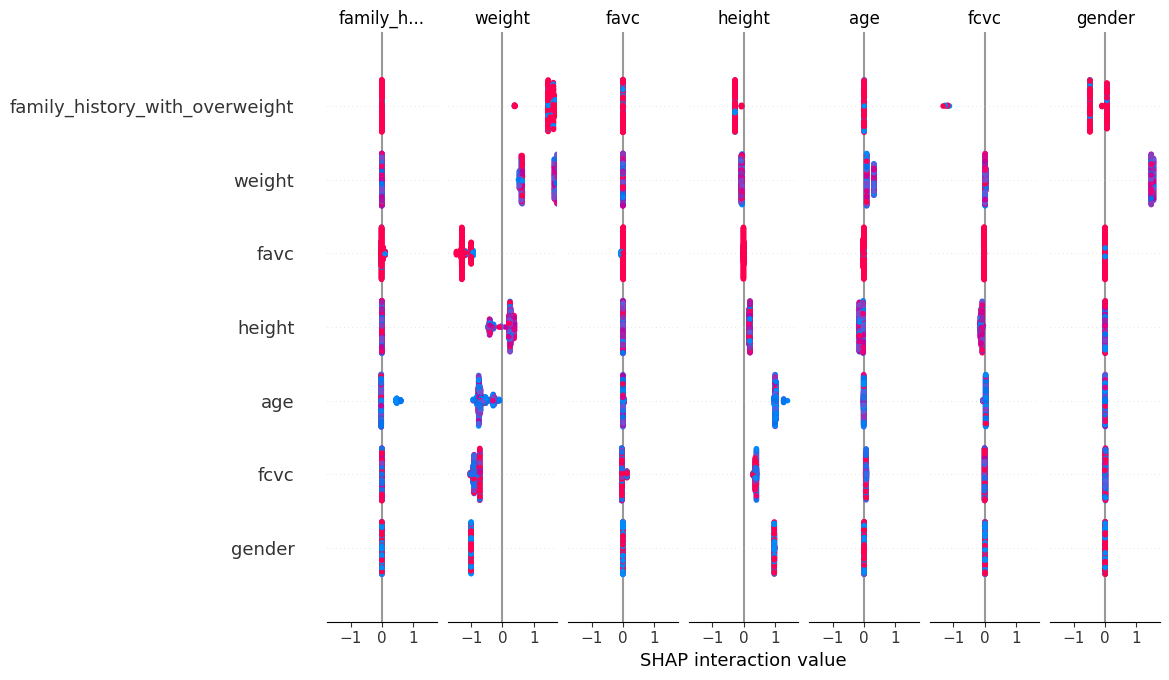

In [28]:
# Feature Importance using SHAP
explainer = shap.TreeExplainer(best_model.named_steps['model'])
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


In [29]:
# Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X, y, cv=cv, scoring='accuracy')
print('CV Mean Accuracy: %0.2f' % cv_scores.mean())


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 1366, number of used features: 17
[LightGBM] [Info] Start training from score -1.999286
[LightGBM] [Info] Start training from score -2.026685
[LightGBM] [Info] Start training from score -1.816965
[LightGBM] [Info] Start training from score -1.983200
[LightGBM] [Info] Start training from score -1.844364
[LightGBM] [Info] Start training from score -1.967369
[LightGBM] [Info] Start training from score -2.004706
[LightGBM] [Warning] No fu

In [30]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
auc_roc = roc_auc_score(y_test, y_probs, multi_class='ovr')


In [31]:
# Create a DataFrame with the metrics
metrics_df = pd.DataFrame({
    'Accuracy': [accuracy],
    'F1 Score': [f1],
    'Precision': [precision],
    'Recall': [recall],
    'AUC ROC': [auc_roc]
})


In [32]:
print(metrics_df)

   Accuracy  F1 Score  Precision    Recall   AUC ROC
0  0.900585  0.900392   0.900915  0.900585  0.990437
